## Using curve fitting, we managed to translate the available data for the uncontroled reentry of Tiangon-1 into a mathematical expression.

See https://www.desmos.com/calculator/15mcnjggsr.

In [2]:
from sympy import *
init_printing()

x, y, r, theta, t, a, E = symbols("x y r theta t a E", Variables = True)
A_l, D_l, S_l, A_s, F_s, phi, D_y = symbols('A_l D_l S_l A_s F_s phi D_y', Variables=True)

mu = symbols("mu", Contant = True) # The gravitational parameter
a = (A_l*ln(D_l - S_l*t) + A_s*sin(F_s*t + phi) + D_y) # Km ..... The semi-major axis (apogee of Tiangong-1)
E = sqrt(mu / a**3) * t # The eccentric anomally

Apogee of Tiangong-1:

In [6]:
Eq(symbols('a'), a)

Where A_l, D_l, S_l, A_s, F_s, phi, D_y are just parameters the minipulate the shape of the curve.

For simpicity, we'll use a circular orbit.

In [3]:
theta = E
r = a

x = r*cos(theta)
y = r*sin(theta)

The following x and y are the position of the satellite, specifically Tiangong-1, duo to the Earth's gravity and the atmospheric drag.

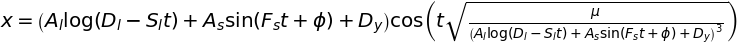

In [4]:
Eq(symbols('x'), x)

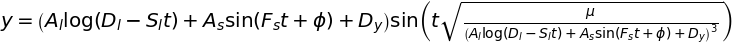

In [5]:
Eq(symbols('y'), y)

Now, using the values of the previously mentioned parameters, which can be found in https://www.desmos.com/calculator/15mcnjggsr, we get:

In [15]:
expr_a = a.subs({A_l:38.4, 
                D_l:122000, 
                S_l:2.5, 
                A_s:5.1, 
                F_s:0.001, 
                phi: 2.7, 
                D_y: 6330})
Eq(symbols("a"), expr_a)

In order to be able to plug time in seconds, we multiply t by (1/(60\*60\*24\*30\*12))\*(48797):

In [18]:
expr_a_sec = expr_a.subs({t:t*(1/(60*60*24*30*12))*(48797)})
Eq(symbols('a_sec'), expr_a_sec)

Plotting 'a' with these values:

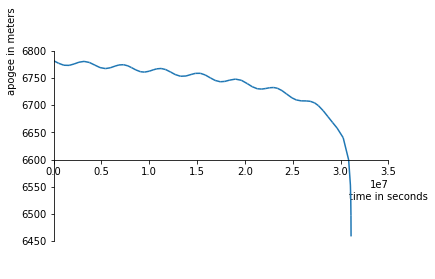

In [28]:
plot(expr_a_sec, 
     (t, 0, 3.2*10**7), 
     xlim=(0, 3.5*10**7), 
     ylim=(6400, 6800), 
     xlabel="\ntime in seconds", 
     ylabel="apogee in meters")

We can now get x and y with everything substituted:

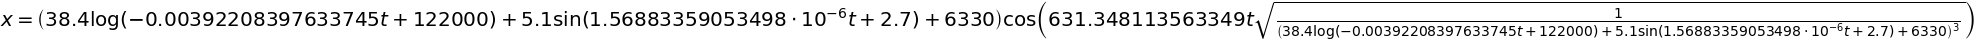

In [20]:
Eq(symbols('x'), x.subs({a:expr_a_sec, mu:398600.4405}))

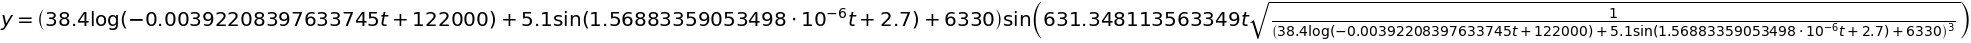

In [21]:
Eq(symbols('y'), y.subs({a:expr_a_sec, mu:398600.4405}))

Now we can simulate Tiangong-1's uncontrolled reentry. See https://www.desmos.com/calculator/yix3q9nyyc